In [ ]:
import json

all_data = []
with open("crawler144/2k.jsonl") as f:
    for line in f:
        data = json.loads(line)
        all_data.append(data)

# should be the same as number of lines
unique_urls = set(data["url"] for data in all_data)
for data in all_data:
    # convert all lists to sets to remove duplicates + normalize to set if NoneType
    data["children"] = set(data["children"]) if data["children"] else set()
    # remove children that were not crawled
    data["children"] = set.intersection(data["children"], unique_urls)

print(f"Number of lines: {len(all_data)}")
print(f"Number of unique urls: {len(unique_urls)}")
print(f"Number of edges: {sum(len(data['children']) for data in all_data)}")

Number of lines: 6547
Number of unique urls: 6547
Number of edges: 331939


In [3]:
from collections import defaultdict

# collect all outbound and inbound links
outbound = defaultdict(set)
inbound = defaultdict(set)
for data in all_data:
    # force to set to remove duplicates
    outbound[data["url"]] = data["children"]
    for child in data["children"]:
        inbound[child].add(data["url"])

# remove self-references
for url in outbound:
    outbound[url].discard(url)
for url in inbound:
    inbound[url].discard(url)

# verify that the number of both dicts match
print(f"Number of unique urls in outbound: {len(outbound)}")
print(f"Number of outbound edges: {sum(len(outbound[url]) for url in outbound)}")
print(f"Number of unique urls in inbound: {len(inbound)}")
print(f"Number of inbound edges: {sum(len(inbound[url]) for url in inbound)}")

Number of unique urls in outbound: 6547
Number of outbound edges: 328174
Number of unique urls in inbound: 6547
Number of inbound edges: 328174


In [4]:
max_outdegree_url = next(iter(outbound))
for url in outbound:
    if len(outbound[url]) > len(outbound[max_outdegree_url]):
        max_outdegree_url = url
print(f"URL with the highest outdegree: {max_outdegree_url}")
print(f"Outdegree of {max_outdegree_url}: {len(outbound[max_outdegree_url])}")

max_indegree_url = next(iter(inbound))
for url in inbound:
    if len(inbound[url]) > len(inbound[max_indegree_url]):
        max_indegree_url = url
print(f"URL with the highest indegree: {max_indegree_url}")
print(f"Indegree of {max_indegree_url}: {len(inbound[max_indegree_url])}")

URL with the highest outdegree: http://eas.caltech.edu/people
Outdegree of http://eas.caltech.edu/people: 217
URL with the highest indegree: https://www.caltech.edu/privacy-notice
Indegree of https://www.caltech.edu/privacy-notice: 3863


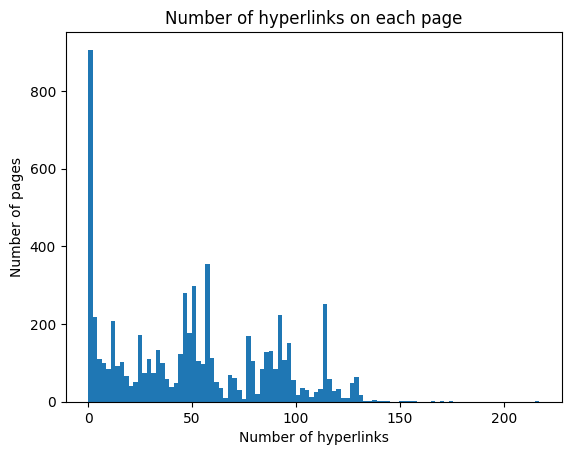

In [5]:
import matplotlib.pyplot as plt

outdegrees = [len(outbound[url]) for url in outbound]
plt.hist(outdegrees, bins=100, range=(0, max(outdegrees)))
plt.xlabel("Number of hyperlinks")
plt.ylabel("Number of pages")
plt.title("Number of hyperlinks on each page")
plt.show()

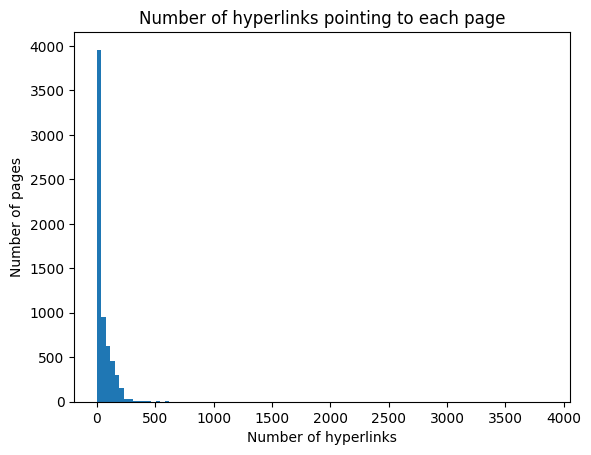

In [6]:
indegrees = [len(inbound[url]) for url in inbound]
plt.hist(indegrees, bins=100, range=(0, max(indegrees)))
plt.title("Number of hyperlinks pointing to each page")
plt.xlabel("Number of hyperlinks")
plt.ylabel("Number of pages")
plt.show()

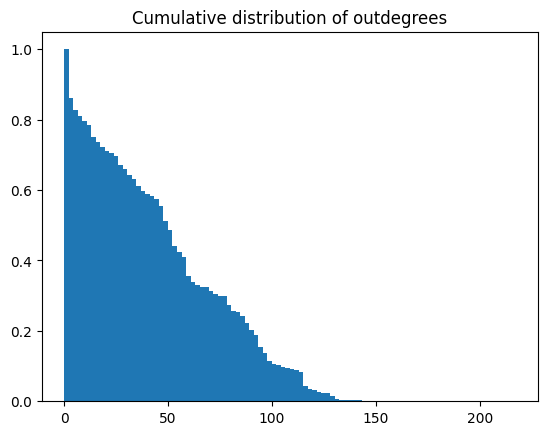

In [7]:
plt.hist(outdegrees, bins=100, range=(0, max(outdegrees)), cumulative=-1, density=True)
plt.title("Cumulative distribution of outdegrees")
plt.show()

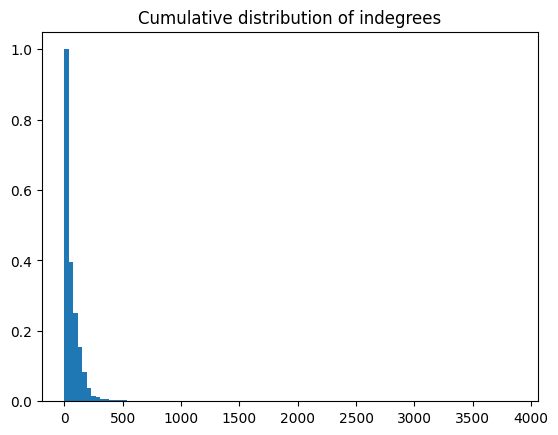

In [8]:
plt.hist(indegrees, bins=100, range=(0, max(indegrees)), cumulative=-1, density=True)
plt.title("Cumulative distribution of indegrees")
plt.show()

In [9]:
import networkx as nx

undirected_edges = defaultdict(set)
for parent in outbound:
    for child in outbound[parent]:
        undirected_edges[parent].add(child)
        undirected_edges[child].add(parent)
for child in inbound:
    for parent in inbound[child]:
        undirected_edges[child].add(parent)
        undirected_edges[parent].add(child)

nx_graph = nx.from_dict_of_lists(undirected_edges)

print(f"Average clustering coefficient: {nx.average_clustering(nx_graph)}")
print(f"Overall clustering coefficient: {nx.transitivity(nx_graph)}")
print(f"Average diameter: {nx.average_shortest_path_length(nx_graph)}")
print(f"Maximal diameter: {nx.diameter(nx_graph)}")

Average clustering coefficient: 0.7750951022701442
Overall clustering coefficient: 0.4247585079850745
Average diameter: 2.6395950762567555
Maximal diameter: 6
